# Analysis of the data obtained from OpenAgrar

In [1]:
import pandas as pd

In [47]:
openagrar = pd.read_csv("output.csv", sep="|")

In [48]:
openagrar.to_excel("output.xlsx")

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [49]:
openagrar.head()

,ID,title,abstract_text,publisher,publication_year,institute,authors_names,language
0,48384,Sainfoin seeds as protein source for weaned pi...,"""Sainfoin (Onobrychis viciifolia) has been use...",vTI,2012,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...",en
1,47994,Prevalence of udder infections and effects on ...,"""The objective of this study was to investigat...",vTI,2012,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...",en
2,46402,Lachgasemissionen beim Rapsanbau,"""Nitrous oxide (N2O) emissions were countinuou...",FAL,1998,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...",de
3,39336,Haltungseinflüsse auf die Fleischbeschaffenhei...,"""Animal housing as influence on pork quality h...",FAL,1999,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...",de
4,39069,Application of near infrared reflectance spect...,"""With reference to applications in forage anal...",FAL,1991,ti,"{'creatorName': {'@nameType': 'Personal', '#te...",en


In [50]:
openagrar['language'].value_counts().reset_index()

,language,count
0,en,9286
1,de,2784
2,fr,12
3,hu,9
4,tr,8
5,sl,8
6,pt,8
7,el,8
8,bg,8
9,cs,6


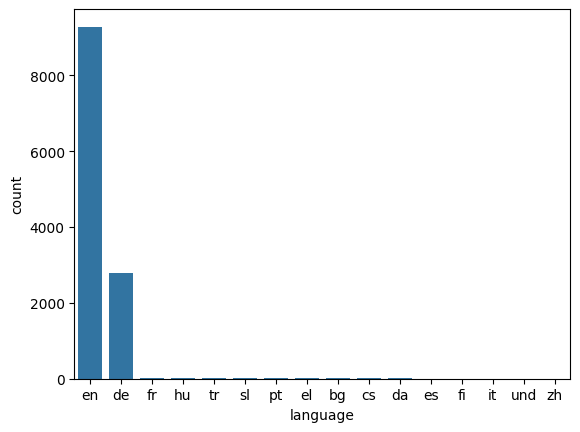

In [51]:
# define Seaborn color palette to use 
sns.barplot(x="language",
           y="count",
           data=openagrar['language'].value_counts().reset_index())
# displaying chart 
plt.show()

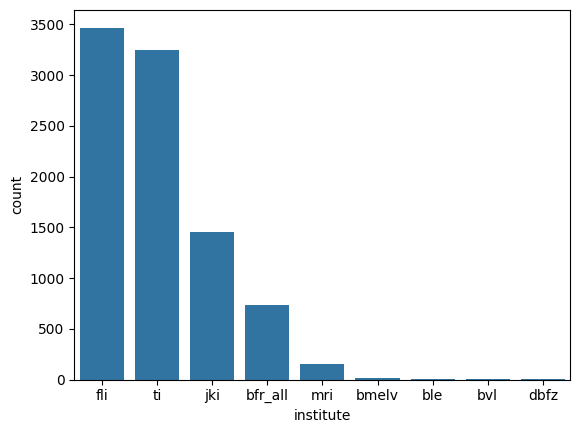

In [55]:
# define Seaborn color palette to use 
sns.barplot(x="institute",
           y="count",
           data=openagrar['institute'].value_counts().reset_index())
# displaying chart 
plt.show()

In [56]:
openagrar['institute'].value_counts().reset_index().head(10)

,institute,count
0,fli,3468
1,ti,3246
2,jki,1453
3,bfr_all,731
4,mri,152
5,bmelv,14
6,ble,10
7,bvl,7
8,dbfz,2


In [58]:
# Filter out rows that do not contain 'en'
filtered_df = openagrar[openagrar['language'].str.contains('en', case=False, na=False)]

In [59]:
filtered_df = filtered_df[openagrar['institute'].str.contains('ti|jki', case=False, na=False)]

/tmp/ipykernel_11021/4147284872.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [60]:
len(filtered_df)

3319

In [62]:
filtered_df.head()

,ID,title,abstract_text,publisher,publication_year,institute,authors_names,language
0,48384,Sainfoin seeds as protein source for weaned pi...,"""Sainfoin (Onobrychis viciifolia) has been use...",vTI,2012,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...",en
1,47994,Prevalence of udder infections and effects on ...,"""The objective of this study was to investigat...",vTI,2012,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...",en
4,39069,Application of near infrared reflectance spect...,"""With reference to applications in forage anal...",FAL,1991,ti,"{'creatorName': {'@nameType': 'Personal', '#te...",en
7,38497,The effect of calcium nutrition on wood format...,"""To study the effect of calcium on wood format...",Wiedebusch Kommissions-Verl.,2007,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...",en
8,38309,Set up of an automatic water quality sampling ...,"""We have developed a high-resolution automatic...",Bundesbehörden und Einrichtungen im Geschäftsb...,2014,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...",en


Show the distributions of years and the distributions of institutes

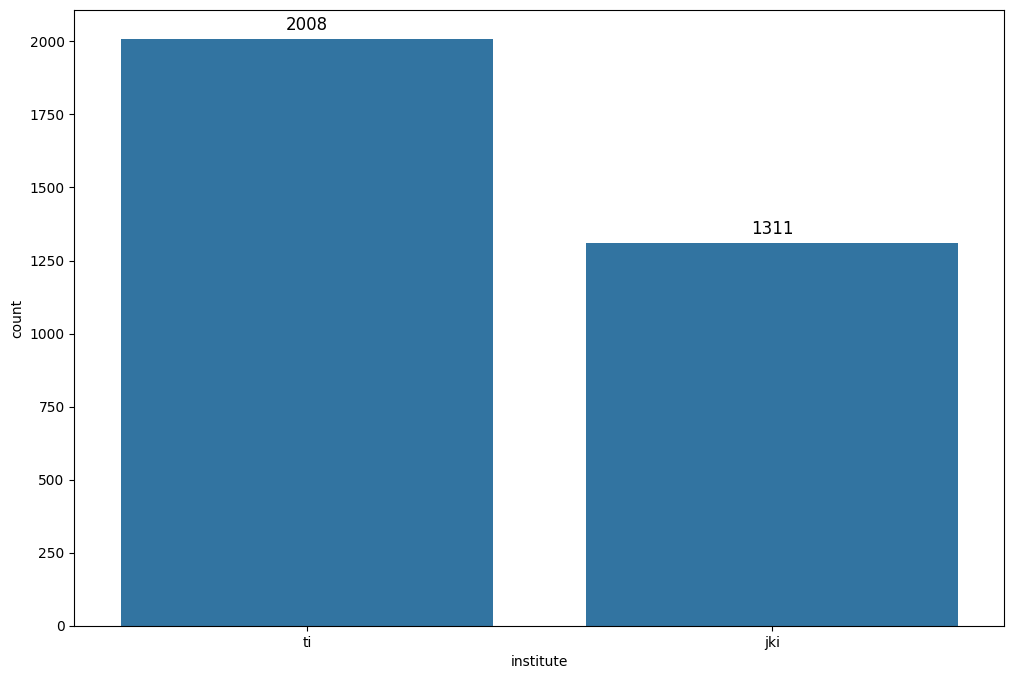

In [72]:
# define Seaborn color palette to use 
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="institute",
           y="count",
           data=filtered_df['institute'].value_counts().reset_index())

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # The value to display
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the text (x, y)
        ha='center', va='center',  # Horizontal and vertical alignment
        fontsize=12, color='black',  # Font size and color
        xytext=(0, 10), textcoords='offset points'  # Offset the text slightly above the bar
    )
# displaying chart 
plt.show()

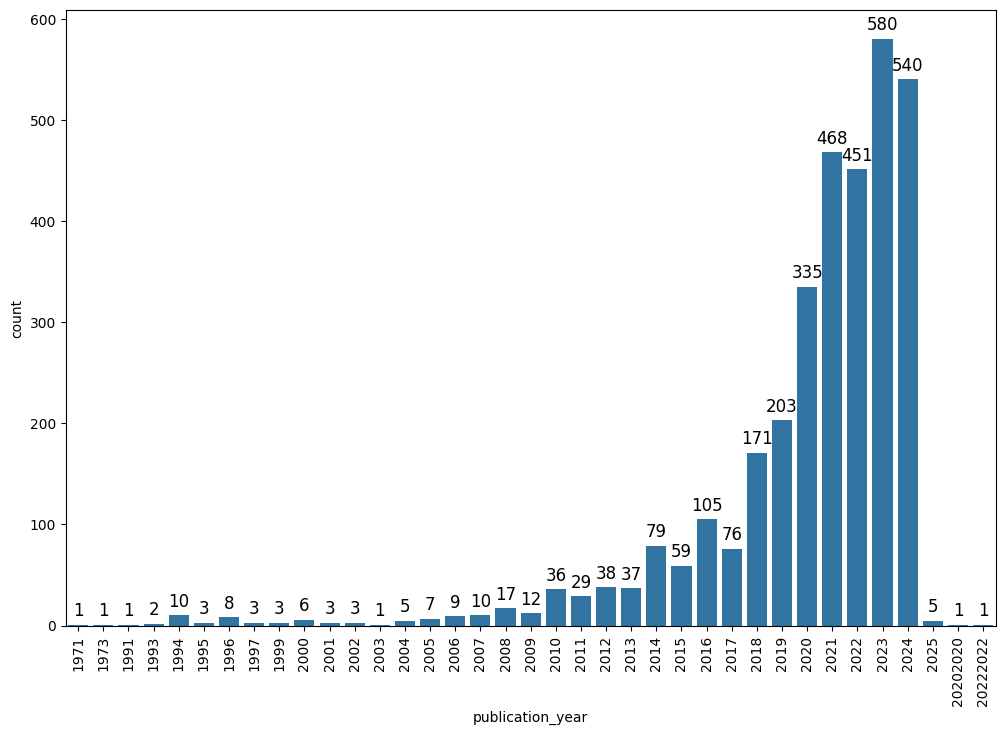

In [71]:
# Set the figure size to make the plot fill the notebook cell
plt.figure(figsize=(12, 8))

# Create the barplot
ax = sns.barplot(x="publication_year", y="count", data=filtered_df['publication_year'].value_counts().reset_index())

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # The value to display
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the text (x, y)
        ha='center', va='center',  # Horizontal and vertical alignment
        fontsize=12, color='black',  # Font size and color
        xytext=(0, 10), textcoords='offset points'  # Offset the text slightly above the bar
    )
# Display the chart
plt.show()

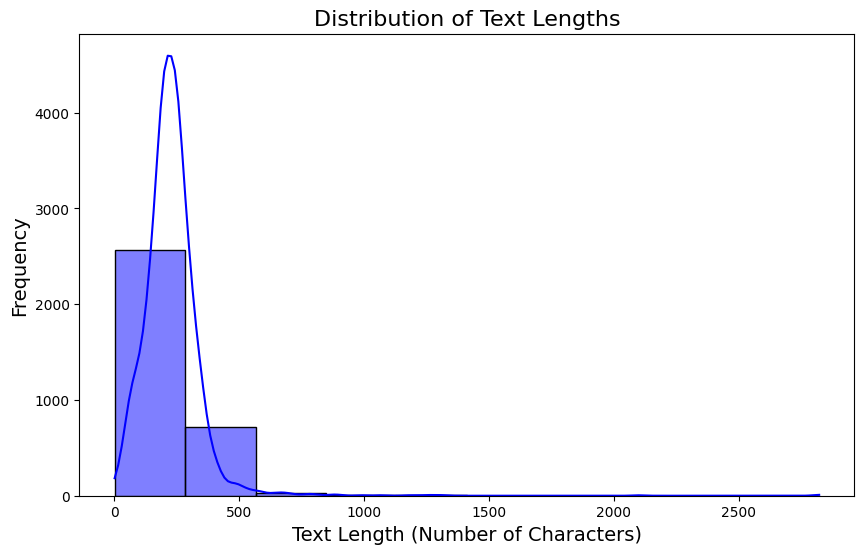

In [75]:
# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot the distribution of text lengths directly using apply() within sns.histplot
sns.histplot(filtered_df['abstract_text'].apply(lambda x: len(x.split(' '))), kde=True, color='blue', bins=10)

# Add labels and title
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length (Number of Characters)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()